In [1]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from sklearn.decomposition import PCA

In [2]:
# Load và tiền xử lý dữ liệu ảnh
def load_data(directory, target_size=(150, 150)):
    images = []
    labels = []
    class_names = sorted(os.listdir(directory))
    num_classes = len(class_names)

    for i, class_name in enumerate(class_names):
        class_dir = os.path.join(directory, class_name)
        for filename in os.listdir(class_dir):
            if filename.endswith(".jpg") or filename.endswith(".png"):
                filepath = os.path.join(class_dir, filename)
                image = cv2.imread(filepath)
                if image is not None:
                    image = cv2.resize(image, target_size)
                    images.append(image)
                    labels.append(i)

    images = np.array(images)
    labels = np.array(labels)

    return images, labels, num_classes


In [3]:
from sklearn.decomposition import PCA

# Load and preprocess image data
def load_data(directory, target_size=(150, 150)):
    images = []
    labels = []
    class_names = sorted(os.listdir(directory))
    num_classes = len(class_names)

    for i, class_name in enumerate(class_names):
        class_dir = os.path.join(directory, class_name)
        for filename in os.listdir(class_dir):
            if filename.endswith(".jpg") or filename.endswith(".png"):
                filepath = os.path.join(class_dir, filename)
                image = cv2.imread(filepath)
                if image is not None:
                    image = cv2.resize(image, target_size)
                    images.append(image.flatten())  # Flatten the image
                    labels.append(i)

    images = np.array(images)
    labels = np.array(labels)

    return images, labels, num_classes

# Load image data
data_directory = "F:\\MachineLearning\\data\\archive\\val"
images, labels, num_classes = load_data(data_directory)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Apply PCA
pca = PCA(n_components=225)  # Number of new dimensions after reduction

# Fit PCA on training data and transform it
X_pca_train = pca.fit_transform(X_train)

# Transform testing data using the same PCA object
X_pca_test = pca.transform(X_test)

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)


In [4]:

# Build the ANN model
model = Sequential([
    Flatten(input_shape=(225,)),  # Input shape adjusted to match the PCA-reduced dimensionality
    Dense(512, activation='relu'),  # Hidden layer with 512 nodes and ReLU activation function
    Dense(num_classes, activation='softmax')  # Output layer with num_classes nodes and softmax activation function
])


In [5]:
# Biên soạn mô hình
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
# Train the model
model.fit(X_pca_train, y_train, epochs=20, batch_size=32, validation_data=(X_pca_test, y_test))


Epoch 1/20
38/38 [==============================] - 1s 10ms/step - loss: 292.3435 - accuracy: 0.5608 - val_loss: 176.5760 - val_accuracy: 0.6233
Epoch 2/20
38/38 [==============================] - 0s 4ms/step - loss: 53.3288 - accuracy: 0.8467 - val_loss: 140.1277 - val_accuracy: 0.6833
Epoch 3/20
38/38 [==============================] - 0s 4ms/step - loss: 22.6552 - accuracy: 0.9108 - val_loss: 127.3401 - val_accuracy: 0.6867
Epoch 4/20
38/38 [==============================] - 0s 4ms/step - loss: 10.0952 - accuracy: 0.9450 - val_loss: 115.3182 - val_accuracy: 0.6900
Epoch 5/20
38/38 [==============================] - 0s 4ms/step - loss: 5.5452 - accuracy: 0.9633 - val_loss: 117.5308 - val_accuracy: 0.7167
Epoch 6/20
38/38 [==============================] - 0s 4ms/step - loss: 5.0159 - accuracy: 0.9700 - val_loss: 142.8940 - val_accuracy: 0.6967
Epoch 7/20
38/38 [==============================] - 0s 4ms/step - loss: 2.7410 - accuracy: 0.9733 - val_loss: 139.0505 - val_accuracy: 0.6900


In [7]:
# Đánh giá mô hình trên tập kiểm tra
test_loss, test_acc = model.evaluate(X_pca_test, y_test)
print('Test accuracy:', test_acc)

10/10 [==============================] - 0s 1ms/step - loss: 232.2487 - accuracy: 0.6700
Test accuracy: 0.6700000166893005


In [8]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.utils import to_categorical

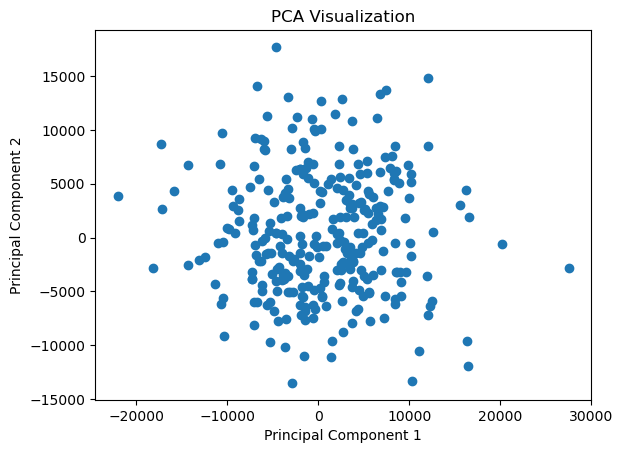

In [11]:
import matplotlib.pyplot as plt
# Hiển thị dữ liệu giảm chiều
plt.scatter(X_pca_test[:, 0], X_pca_test[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization')
plt.show()

In [13]:
from sklearn.cluster import KMeans
# Áp dụng K-means để phân cụm
kmeans = KMeans(n_clusters=3)  
kmeans.fit(X_pca_test)


C:\Users\DELL PRO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\DELL PRO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=3)

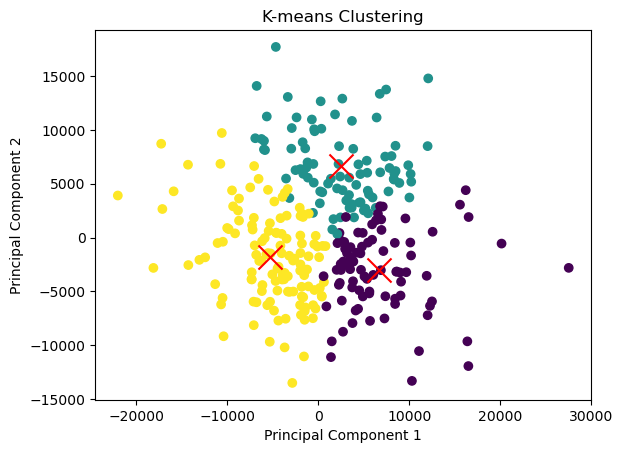

In [15]:
# Hiển thị kết quả phân cụm
plt.scatter(X_pca_test[:, 0], X_pca_test[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='x')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering')
plt.show()

C:\Users\DELL PRO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\DELL PRO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


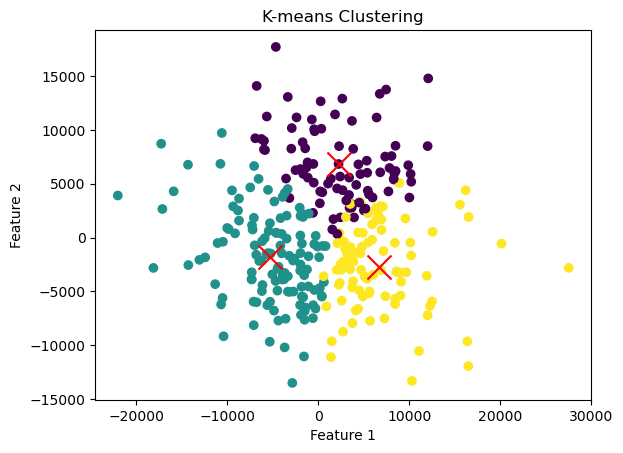

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Chuyển danh sách X_pca_test thành mảng numpy
X_pca_test_ar = np.array(X_pca_test)

# Tính toán nhãn của các cụm trên dữ liệu giảm chiều
labels = kmeans.fit_predict(X_pca_test_ar)

# Tính toán centroid trên dữ liệu giảm chiều
centroids = kmeans.cluster_centers_

# Hiển thị dữ liệu và centroids
plt.scatter(X_pca_test_ar[:, 0], X_pca_test_ar[:, 1], c=labels, cmap='viridis')  # labels chứa nhãn của các cụm
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='x')  # Hiển thị các centroids
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-means Clustering')
plt.show()
